## Exercise 1: Decisive Distributions

### Import Dependencies

In [7]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [8]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("KEY")
alpaca_secret_key = os.getenv("SECRET")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Read in stock data using Alpaca API

In [10]:
tickers = ['AAPL', 'GOOG', 'FB', 'AMZN']

start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-04", tz="America/New_York").isoformat()

stocks_df = pd.DataFrame()
close_price = []

stock_data = api.get_barset(tickers, "day", start=start_date, end=end_date, limit=5).df
stock_data.head()

AAPL                                       AMZN  \
                              open    high     low   close    volume     open   
time                                                                            
2020-05-29 00:00:00-04:00  319.250  321.15  316.47  318.76  56248101  2415.94   
2020-06-01 00:00:00-04:00  317.750  322.35  317.21  321.76  37704502  2448.00   
2020-06-02 00:00:00-04:00  320.745  323.44  318.93  323.42  37968664  2467.00   
2020-06-03 00:00:00-04:00  324.660  326.10  322.30  325.09  45506089  2468.01   
2020-06-04 00:00:00-04:00  324.390  325.62  320.78  322.25  38930216  2477.43   

                                                                     FB  \
                              high        low    close   volume    open   
time                                                                      
2020-05-29 00:00:00-04:00  2439.00  2398.1973  2436.53  5483326  225.20   
2020-06-01 00:00:00-04:00  2476.93  2444.1700  2470.12  5441594  224.59   
2020-06-02 00:00:00-04:00  2473.53  2445.3100  2473.30  4430214  230.94   
2020-06-03 00:00:00-04:00  2488.00  2461.1700  2478.40  4700140  232.11   
2020-06-04 00:00:00-04:00  2507.54  2450.0100  2460.60  5957350  229.56   

                                                                GOOG  \
                             high     low   close    volume     open   
time                                                                   
2020-05-29 00:00:00-04:00  227.49  222.88  224.21  18706304  1416.94   
2020-06-01 00:00:00-04:00  232.44  223.50  231.94  33886754  1418.39   
2020-06-02 00:00:00-04:00  233.00  226.56  232.83  36197240  1430.55   
2020-06-03 00:00:00-04:00  232.65  228.53  230.06  28224941  1438.30   
2020-06-04 00:00:00-04:00  231.63  224.61  226.29  15405418  1430.40   

                                                                   
                                high        low    close   volume  
time                                                               
2020-05-29 00:00:00-04:00  1432.5700  1413.3500  1427.92  1372379  
2020-06-01 00:00:00-04:00  1437.9600  1418.0000  1431.36  1033558  
2020-06-02 00:00:00-04:00  1439.4700  1418.8300  1439.47  2130734  
2020-06-03 00:00:00-04:00  1446.5522  1429.7772  1435.32  1062233  
2020-06-04 00:00:00-04:00  1438.9600  1404.7300  1412.73  2675444

### Create a new DataFrame and store the closing prices of each stock.

In [12]:
# Create and empty DataFrame for closing prices
close_price_df = pd.DataFrame()

# Fetch the closing prices for all the tickers
close_price_df['AAPL'] = stock_data['AAPL']['close']
close_price_df['AMZN'] = stock_data['AMZN']['close']
close_price_df['FB'] = stock_data['FB']['close']
close_price_df['GOOG'] = stock_data['GOOG']['close']

# Drop the time component of the date
close_price_df.index = close_price_df.index.date

# Display sample data
close_price_df.head()

,AAPL,AMZN,FB,GOOG
2020-05-29,318.76,2436.53,224.21,1427.92
2020-06-01,321.76,2470.12,231.94,1431.36
2020-06-02,323.42,2473.30,232.83,1439.47
2020-06-03,325.09,2478.40,230.06,1435.32
2020-06-04,322.25,2460.60,226.29,1412.73


### Calculate the daily returns for each stock using the `pct_change()` function

In [16]:
# Compute daily returns
daily_returns = close_price_df.pct_change().dropna()

# Display sample data
daily_returns

,AAPL,AMZN,FB,GOOG
2020-06-01,0.009411,0.013786,0.034477,0.002409
2020-06-02,0.005159,0.001287,0.003837,0.005666
2020-06-03,0.005164,0.002062,-0.011897,-0.002883
2020-06-04,-0.008736,-0.007182,-0.016387,-0.015739


### Plot Distributions

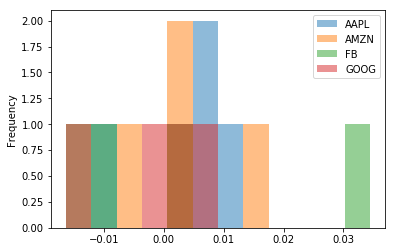

In [17]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
axes = daily_returns.plot.hist(bins=12, alpha=0.5)

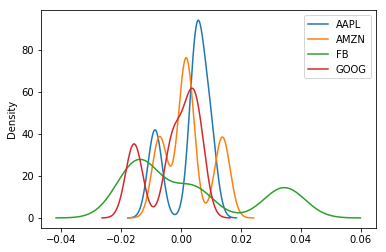

In [19]:
# Visualize the distribution of daily returns across all stocks using a density plot
daily_returns.plot.kde(bw_method=0.3)